<a href="https://colab.research.google.com/github/henrique-esilva/resilia_modulo5_projetoEmGrupo/blob/main/projeto_em_grupo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOBRE O PROJETO
Esse é um projeto integrador, em que nós utilizamos
todas as ferramentas e conhecimentos trabalhados ao
longo do curso como Python e suas bibliotecas, estatística descritiva, MySQl, Power BI, Trello e metodologias ágeis como o Kanban.

Realizamos uma análise exploratória histórica dos valores de
criptomoedas.

As fontes de dados que serão utilizadas no projeto estão
disponíveis no site do Kaggle ou através do link: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory.

Criptomoedas são moedas digitais descentralizadas baseadas em criptografia, que
operam em uma rede blockchain que permite transações seguras e transparentes
sem a necessidade de intermediários, como bancos. Elas fazem parte do mundo
digital, afetam a economia atual e são consideradas altamente voláteis.

Por isso, eu e meu squad de dados da corretora Specter Investimentos fomos escalados para realizar uma análise exploratória relacionada à série histórica dos valores das 10 criptomoedas escolhidas pela empresa.

#Detalhes do projeto
A análise deverá responder às seguintes perguntas:
1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

O diretor da corretora nos pediu para incluir mais duas perguntas de insights que podemos tirar da análise para obtermos a seguinte conclusão

8.

9.

#IMPORTAÇÕES DAS BIBLIOTECAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#TRATAMENTO E EXIBIÇÃO DOS DADOS PARA ANÁLISE EXPLORATÓRIA

In [ ]:
#CRIANDO UM DATASET PARA CADA UMA DAS 10 CRIPTOMOEDAS QUE VAMOS ANALISAR
url1 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_BinanceCoin.csv'
url2 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Bitcoin.csv'
url3 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Dogecoin.csv'
url4 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Ethereum.csv'
url5 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Litecoin.csv'
url6 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Monero.csv'
url7 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Polkadot.csv'
url8 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Solana.csv'
url9 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Stellar.csv'
url10 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_XRP.csv'

Binance = pd.read_csv(url1)
Bitcoin = pd.read_csv(url2)
Dogecoin = pd.read_csv(url3)
Ethereum = pd.read_csv(url4)
Litecoin = pd.read_csv(url5)
Monero = pd.read_csv(url6)
Polkadot = pd.read_csv(url7)
Solana = pd.read_csv(url8)
Stellar = pd.read_csv(url9)
XRP = pd.read_csv(url10)

In [ ]:
#COLOCANDO TODAS AS CRIPTOMOEDAS EM UMA LISTA PARA ACESSAR TODAS DE UMA VEZ USANDO O LAÇO DE REPETIÇÃO "FOR" PARA ANÁLISE
todas_as_cripto = [Bitcoin,Binance,Dogecoin,Ethereum,Litecoin,Monero,Polkadot,Solana,Stellar,XRP]
for cripto in todas_as_cripto:
  print(cripto)

       SNo     Name Symbol                 Date          High           Low  \
0        1  Bitcoin    BTC  2013-04-29 23:59:59    147.488007    134.000000   
1        2  Bitcoin    BTC  2013-04-30 23:59:59    146.929993    134.050003   
2        3  Bitcoin    BTC  2013-05-01 23:59:59    139.889999    107.720001   
3        4  Bitcoin    BTC  2013-05-02 23:59:59    125.599998     92.281898   
4        5  Bitcoin    BTC  2013-05-03 23:59:59    108.127998     79.099998   
...    ...      ...    ...                  ...           ...           ...   
2986  2987  Bitcoin    BTC  2021-07-02 23:59:59  33939.588699  32770.680780   
2987  2988  Bitcoin    BTC  2021-07-03 23:59:59  34909.259899  33402.696536   
2988  2989  Bitcoin    BTC  2021-07-04 23:59:59  35937.567147  34396.477458   
2989  2990  Bitcoin    BTC  2021-07-05 23:59:59  35284.344430  33213.661034   
2990  2991  Bitcoin    BTC  2021-07-06 23:59:59  35038.536363  33599.916169   

              Open         Close        Volume     

In [ ]:
#RENOMEAR CADA ITEM DA LISTA "TODAS_AS_CRIPTO" AS COLUNAS DAS CRIPTOMOEDAS PARA PT-BR USANDO O LAÇO DE REPETIÇÃO "FOR" APENAS O QUE VAMOS USAR
for cripto in todas_as_cripto:
  cripto.rename(columns={'Name': 'Nome'}, inplace=True)
  cripto.rename(columns={'Date': 'Data'}, inplace=True)
  cripto.rename(columns={'High': 'Alta'}, inplace=True)
  cripto.rename(columns={'Low': 'Baixa'}, inplace=True)
  cripto.rename(columns={'Open': 'Aberto'}, inplace=True)
  cripto.rename(columns={'Close': 'Fechado'}, inplace=True)
  cripto.rename(columns={'Marketcap': 'Valor de Mercado'}, inplace=True)
todas_as_cripto

[       SNo     Nome Symbol                 Data          Alta         Baixa  \
 0        1  Bitcoin    BTC  2013-04-29 23:59:59    147.488007    134.000000   
 1        2  Bitcoin    BTC  2013-04-30 23:59:59    146.929993    134.050003   
 2        3  Bitcoin    BTC  2013-05-01 23:59:59    139.889999    107.720001   
 3        4  Bitcoin    BTC  2013-05-02 23:59:59    125.599998     92.281898   
 4        5  Bitcoin    BTC  2013-05-03 23:59:59    108.127998     79.099998   
 ...    ...      ...    ...                  ...           ...           ...   
 2986  2987  Bitcoin    BTC  2021-07-02 23:59:59  33939.588699  32770.680780   
 2987  2988  Bitcoin    BTC  2021-07-03 23:59:59  34909.259899  33402.696536   
 2988  2989  Bitcoin    BTC  2021-07-04 23:59:59  35937.567147  34396.477458   
 2989  2990  Bitcoin    BTC  2021-07-05 23:59:59  35284.344430  33213.661034   
 2990  2991  Bitcoin    BTC  2021-07-06 23:59:59  35038.536363  33599.916169   
 
             Aberto       Fechado     

In [ ]:
#CONCATENANDO TODAS AS CRIPTOMOEDAS
todas_as_cripto = pd.concat([Bitcoin, Ethereum, Monero, XRP, Dogecoin, Solana, Litecoin, Polkadot, Binance, Stellar])
todas_as_cripto

,SNo,Nome,Symbol,Data,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2522,2523,Stellar,XLM,2021-07-02 23:59:59,0.273359,0.252874,0.269148,0.263427,3.487793e+08,6.118631e+09
2523,2524,Stellar,XLM,2021-07-03 23:59:59,0.270331,0.259710,0.263304,0.264324,3.310069e+08,6.139464e+09
2524,2525,Stellar,XLM,2021-07-04 23:59:59,0.272314,0.259118,0.264254,0.268128,3.376196e+08,6.227819e+09
2525,2526,Stellar,XLM,2021-07-05 23:59:59,0.268272,0.252300,0.268272,0.254456,3.359242e+08,5.910264e+09


In [ ]:
#REMOVER AS COLUNAS QUE NÃO VAMOS USAR "SNo" E "Symbol"
todas_as_cripto = todas_as_cripto.drop('SNo', axis=1)
todas_as_cripto = todas_as_cripto.drop('Symbol', axis=1)
todas_as_cripto

,Nome,Data,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
0,Bitcoin,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,Bitcoin,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,Bitcoin,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,Bitcoin,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,Bitcoin,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...
2522,Stellar,2021-07-02 23:59:59,0.273359,0.252874,0.269148,0.263427,3.487793e+08,6.118631e+09
2523,Stellar,2021-07-03 23:59:59,0.270331,0.259710,0.263304,0.264324,3.310069e+08,6.139464e+09
2524,Stellar,2021-07-04 23:59:59,0.272314,0.259118,0.264254,0.268128,3.376196e+08,6.227819e+09
2525,Stellar,2021-07-05 23:59:59,0.268272,0.252300,0.268272,0.254456,3.359242e+08,5.910264e+09


In [ ]:
#ALTERAR A ORDEM DA DATA EM UM FORMATO AMERICANO PARA QUE O MYSQL POSSA ENTENDER
todas_as_cripto['Data'] = pd.to_datetime(todas_as_cripto['Data']).dt.strftime('%Y-%m-%d')
todas_as_cripto

,Nome,Data,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
0,Bitcoin,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,Bitcoin,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,Bitcoin,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,Bitcoin,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,Bitcoin,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...
2522,Stellar,2021-07-02,0.273359,0.252874,0.269148,0.263427,3.487793e+08,6.118631e+09
2523,Stellar,2021-07-03,0.270331,0.259710,0.263304,0.264324,3.310069e+08,6.139464e+09
2524,Stellar,2021-07-04,0.272314,0.259118,0.264254,0.268128,3.376196e+08,6.227819e+09
2525,Stellar,2021-07-05,0.268272,0.252300,0.268272,0.254456,3.359242e+08,5.910264e+09


In [ ]:
#CRIANDO UM FILTRO PARA CADA CRIPTOMOEDA DA DATA 2013/07/26 ATÉ 2021/01/01
criptos_formatadas = {}
for nome, df in todas_as_cripto.groupby('Nome'):
    df['Data'] = pd.to_datetime(df['Data'])
    filtro = (df['Data'] > '2013-07-26') & (df['Data'] < '2021-01-01')
    criptos_formatadas[nome] = df.loc[filtro]

# Convertendo o dicionário para uma lista de DataFrames
lista_criptos_formatadas = list(criptos_formatadas.values())

# Concatenando a lista de DataFrames em um único DataFrame
resultado_cripto = pd.concat(lista_criptos_formatadas)

# Salvando o DataFrame final em um arquivo CSV
resultado_cripto.to_csv('hall_of_cripto.csv', sep= ';', index=False)

In [ ]:
#ORDENAR OS DADOS DA COLUNA DATA EM ORDEM CRESCENTE E MOSTRAR OS 10 PRIMEIROS
resultado_cripto = resultado_cripto.sort_values('Data')
resultado_cripto.head(10)

,Nome,Data,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
89,Litecoin,2013-07-27,2.935070,2.836720,2.896930,2.879950,0.0,5.706961e+07
89,Bitcoin,2013-07-27,96.995003,93.000000,96.020103,94.115997,0.0,1.079492e+09
90,Litecoin,2013-07-28,3.026130,2.840690,2.884860,2.977790,0.0,5.909180e+07
90,Bitcoin,2013-07-28,100.577003,94.000000,94.400002,99.755997,0.0,1.144603e+09
91,Litecoin,2013-07-29,3.040700,2.942500,2.943280,2.963140,0.0,5.888198e+07
91,Bitcoin,2013-07-29,102.500000,98.455002,98.599998,101.199997,0.0,1.161619e+09
92,Bitcoin,2013-07-30,107.989998,100.470001,101.488998,107.989998,0.0,1.240092e+09
92,Litecoin,2013-07-30,2.995830,2.883800,2.972610,2.985920,0.0,5.941811e+07
93,Litecoin,2013-07-31,3.027720,2.843040,3.001010,2.868680,0.0,5.715638e+07
93,Bitcoin,2013-07-31,111.344002,103.879997,107.949997,106.089996,0.0,1.218778e+09


#ANÁLISE EXPLORATÓRIA

#####Nesse próximo passo iremos realizar uma análise usando estatística descritiva

In [ ]:
#Calculando a média, moda, mediana, variância e o desvio padrão das colunas
colunas_escolhidas = ['Aberto', 'Fechado', 'Volume', 'Alta', 'Baixa', 'Valor de Mercado']
for i in colunas_escolhidas:
  print(f'\n\n-----Média, moda, mediana, variância e o desvio padrão da coluna {i}-----')
  print(resultado_cripto[i].agg(['mean', lambda x: x.mode().iloc[0], 'median', 'var', 'std']))



-----Média, moda, mediana, variância e o desvio padrão da coluna Aberto-----
mean        6.410260e+02
<lambda>    1.295800e-04
median      3.543645e+00
var         5.306886e+06
std         2.303668e+03
Name: Aberto, dtype: float64


-----Média, moda, mediana, variância e o desvio padrão da coluna Fechado-----
mean        6.425766e+02
<lambda>    2.080500e-04
median      3.556995e+00
var         5.348965e+06
std         2.312783e+03
Name: Fechado, dtype: float64


-----Média, moda, mediana, variância e o desvio padrão da coluna Volume-----
mean        1.882748e+09
<lambda>    0.000000e+00
median      4.640139e+07
var         3.461740e+19
std         5.883655e+09
Name: Volume, dtype: float64


-----Média, moda, mediana, variância e o desvio padrão da coluna Alta-----
mean        6.578619e+02
<lambda>    1.080000e+02
median      3.637050e+00
var         5.604133e+06
std         2.367305e+03
Name: Alta, dtype: float64


-----Média, moda, mediana, variância e o desvio padrão da coluna Bai

####Realizei uma comparação das criptomoedas através do tempo usando o valor de mercado como parâmetro
Com base na análise do gráfico, é possível observar a performance de várias criptomoedas ao longo do tempo. O gráfico mostra os preços dessas 10 criptomoedas ao longo de um período de tempo, com variações ascendentes e descendentes ao longo dos anos.

Através do gráfico, podemos observar a volatilidade do mercado de criptomoedas, com os preços das criptomoedas apresentando flutuações significativas. Isso indica que o mercado de criptomoedas é altamente dinâmico e sujeito a mudanças rápidas.

Além disso, o gráfico também apresenta uma linha que representa a capitalização de mercado geral das criptomoedas. Essa linha fornece uma noção do tamanho do mercado de criptomoedas como um todo.

Em resumo, o gráfico indica a flutuação dos preços das criptomoedas ao longo do tempo, destacando a volatilidade do mercado, enquanto a linha de capitalização de mercado geral fornece uma visão geral do tamanho do mercado de criptomoedas.

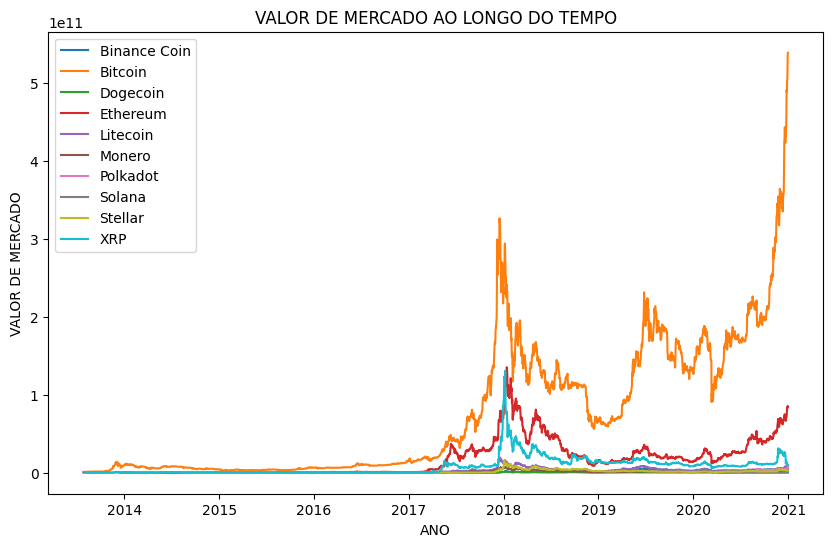

In [ ]:
# Agrupando por nome
nomes = resultado_cripto.groupby('Nome')

plt.figure(figsize=(10, 6))

# Iterar sobre cada grupo e plotar o gráfico de linha para 'Valor de Mercado'
for nome, grupo in nomes:
    # Plotar gráfico de linha para 'Valor de Mercado'
    plt.plot(grupo['Data'], grupo['Valor de Mercado'], label=nome)

# Adicionar título ao gráfico
plt.title('VALOR DE MERCADO AO LONGO DO TEMPO')
plt.xlabel('ANO')
plt.ylabel('VALOR DE MERCADO')
plt.legend()
plt.show()

Olhando para o gráfico, podemos observar que ele mostra a relação entre o volume de negociação e o valor de mercado das criptomoedas listadas. O eixo x representa o valor de mercado, enquanto o eixo y representa o volume de negociação.

Podemos ver que, em geral, há uma tendência positiva entre o valor de mercado e o volume de negociação das criptomoedas. Isso significa que, à medida que o valor de mercado aumenta, o volume de negociação também tende a aumentar. Isso indica um maior interesse e atividade de negociação nas criptomoedas quando seus valores de mercado são mais altos.

No entanto, também podemos observar que existem algumas criptomoedas com valores de mercado relativamente baixos, mas com um volume de negociação bastante alto. Isso sugere que essas criptomoedas podem ter uma base de usuários ativa e um interesse significativo, mesmo que seu valor de mercado não seja elevado.

Além disso, podemos notar algumas criptomoedas com valores de mercado elevados, mas com um volume de negociação relativamente baixo. Isso pode indicar que essas criptomoedas têm menos atividade de negociação, apesar de seu alto valor de mercado. Isso pode ser influenciado por vários fatores, como a liquidez do mercado e a disponibilidade de compradores e vendedores.

Em resumo, o gráfico mostra a relação entre o valor de mercado e o volume de negociação das criptomoedas. Ele oferece insights sobre o interesse e a atividade de negociação em diferentes criptomoedas com base em seu valor de mercado e volume.

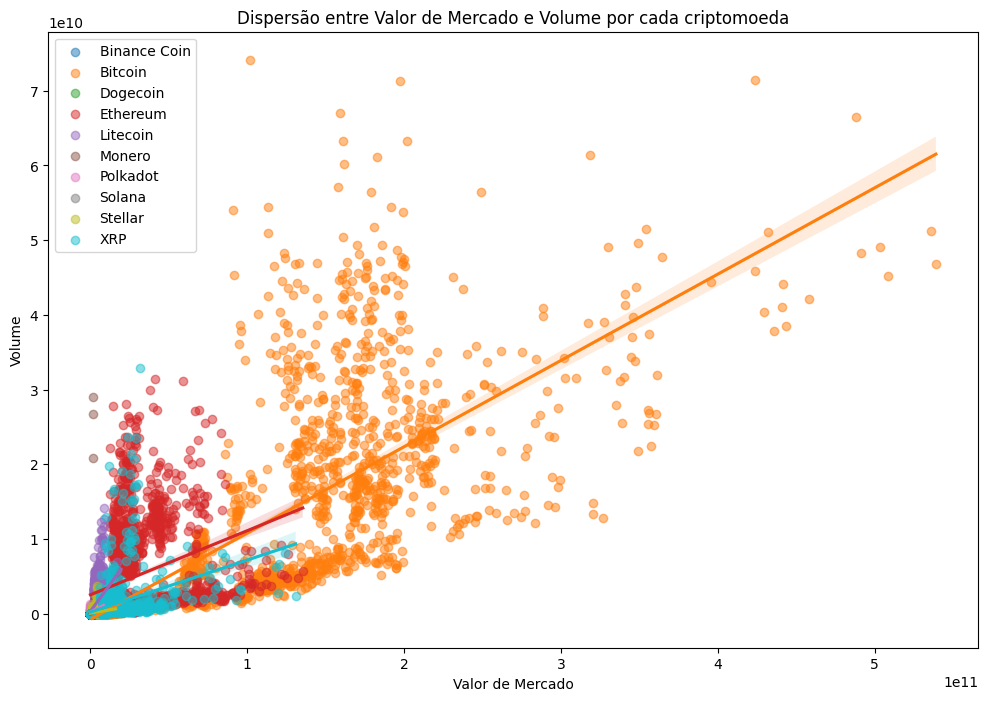

In [ ]:
# Criar scatter plots com linha de tendência para cada criptomoeda
plt.figure(figsize=(12, 8))


for criptomoeda, grupo in resultado_cripto.groupby('Nome'):
    sns.regplot(x='Valor de Mercado', y='Volume', data=grupo, label=criptomoeda, scatter_kws={'alpha':0.5})

plt.title('Dispersão entre Valor de Mercado e Volume por cada criptomoeda')
plt.xlabel('Valor de Mercado')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [ ]:
#CALCULO DE CORRELAÇÃO
correlacao_todas_as_cripto = todas_as_cripto[['Volume', 'Valor de Mercado']]
correlacao_todas_as_cripto.corr()

,Volume,Valor de Mercado
Volume,1.000000,0.816492
Valor de Mercado,0.816492,1.000000


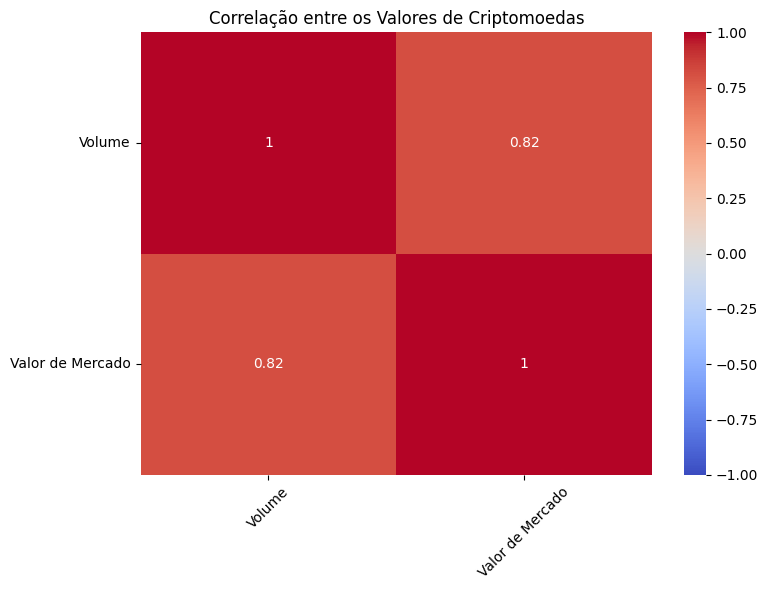

In [ ]:
#MAPA DE CALOR GRÁFICO DE CORRELAÇÃO
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_todas_as_cripto.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre os Valores de Criptomoedas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
cripto_separadas = [Bitcoin, Ethereum, Monero, XRP, Dogecoin, Solana, Litecoin, Polkadot, Binance, Stellar]
cripto_separadas_forma = ['Bitcoin', 'Ethereum', 'Monero', 'XRP', 'Dogecoin', 'Solana', 'Litecoin', 'Polkadot', 'Binance', 'Stellar']

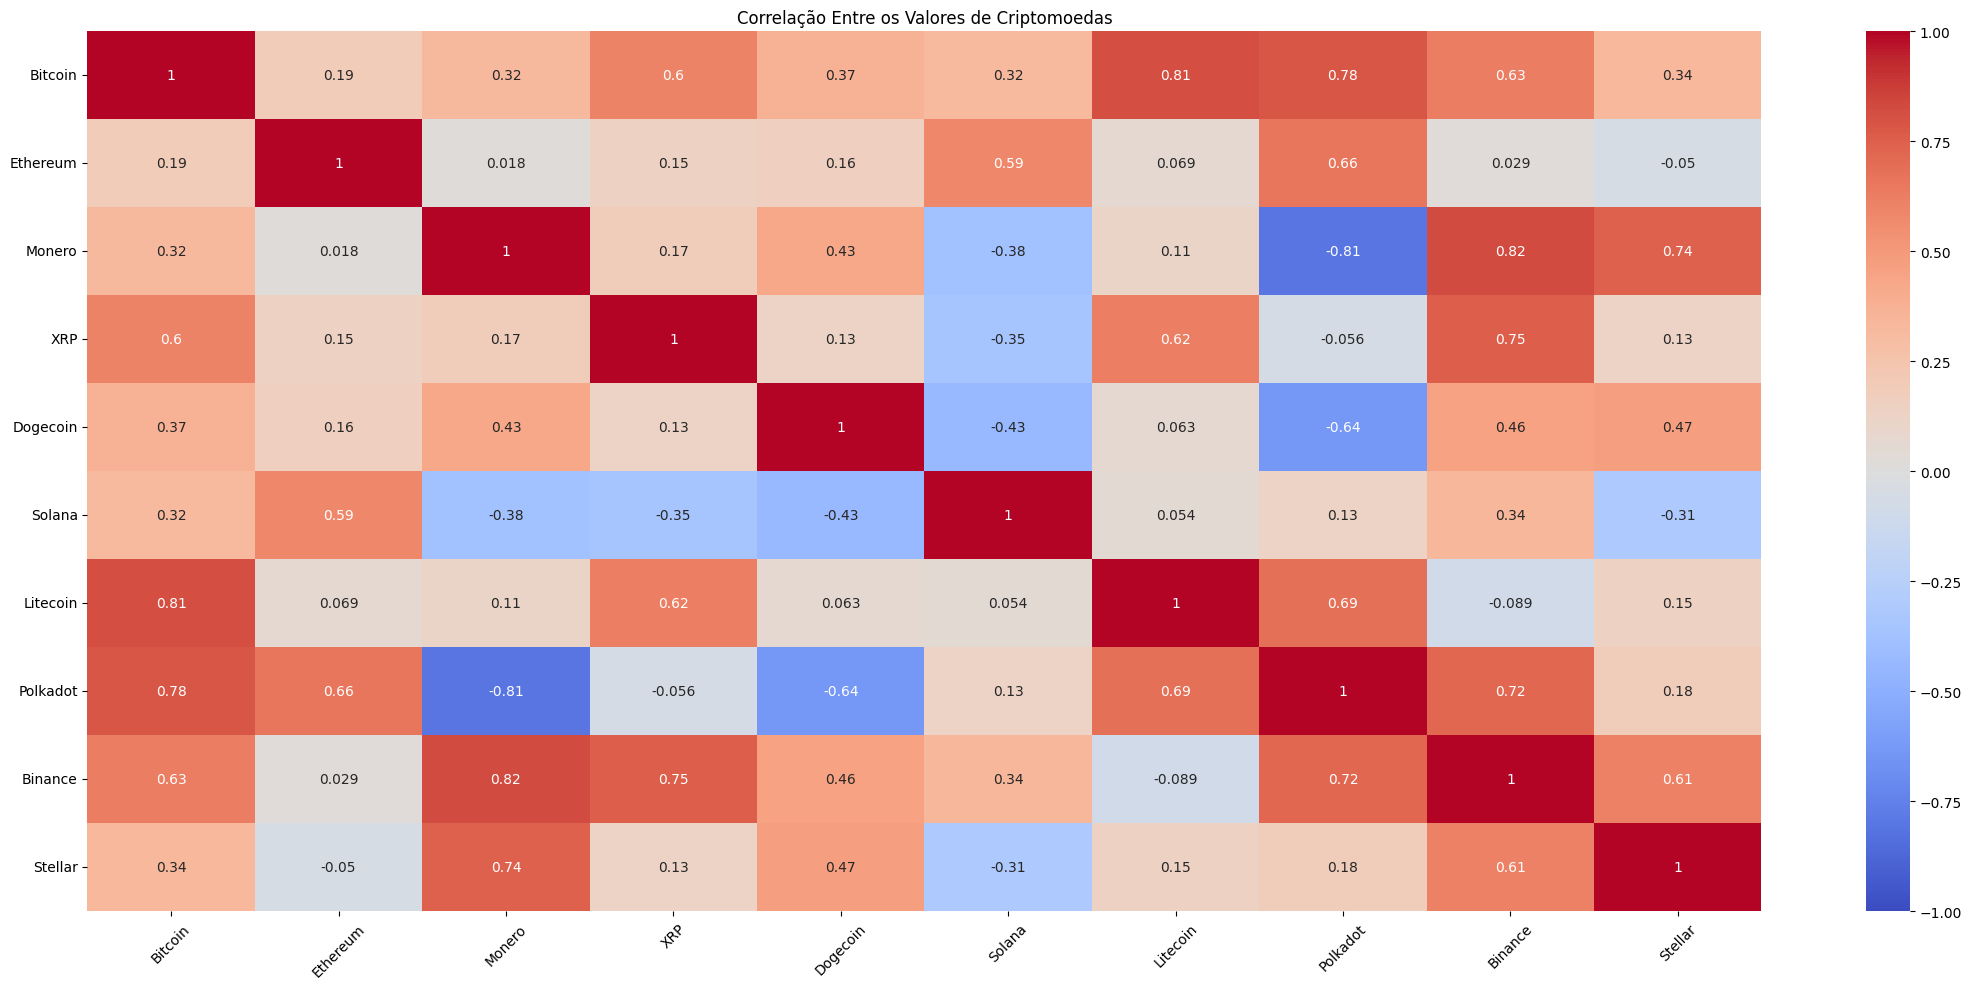

In [ ]:
# Criar um novo DataFrame para armazenar as informações de 'close' e nome da moeda
cripto_dataframe = pd.DataFrame()


for i, moeda_df in enumerate(cripto_separadas):
    nome_moeda = f'Moeda_{i+1}'
    close_column = moeda_df['Fechado']
    cripto_dataframe[nome_moeda] = close_column

correlacao_matrix = cripto_dataframe.corr()

correlacao_matrix.columns = cripto_separadas_forma
correlacao_matrix.index = cripto_separadas_forma


# Configurando o mapa de calor:
plt.figure(figsize=(22, 10))
sns.heatmap(correlacao_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Configurando os eixos:
plt.title('Correlação Entre os Valores de Criptomoedas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()